# Análise de Dados de RH

## Instalando e Carregando as Bibliotecas

Instalando as Bibliotecas

In [ ]:
!pip install missingno
!pip install category_encoders
!pip install plotly

Importando as Bibliotecas

In [2]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenhária de atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore warning
import warnings
warnings.simplefilter("ignore")

### Importando os Dados

Carregando os Dados

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Análise de Dados com Python - DSA/Projeto RH - Cap 02/Datasets/aug_train.csv')

Informações gerais sobre os dados

In [4]:
# Tamanho atual do dataset
print(f'O dataset possui atualmente {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset possui atualmente 19158 linhas e 14 colunas.


In [5]:
# Nome das colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
# Primeiras linhas do dataframe
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
# Resumo das informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratória dos Dados

Descrevendo variáveis categóricas

In [8]:
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


Descrevendo variáveis numéricas

* city_development_index: o índice de desenvolvimento médio é de 0.828848 e a mediana é 0.903000, com desvio padrão de 0.123; indicando que a maioria dos candidatos moram em cidades desenvolvidas.

* training_hours: a média de 65,365, mediana de 47 e máximo de 336; indica que a maioria dos candidatos possuem poucas horas de treinamento, mas alguns gataram muito tempo em treinamentos.

In [9]:
df.describe().drop(columns=['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


Visualização dos dados categóricos

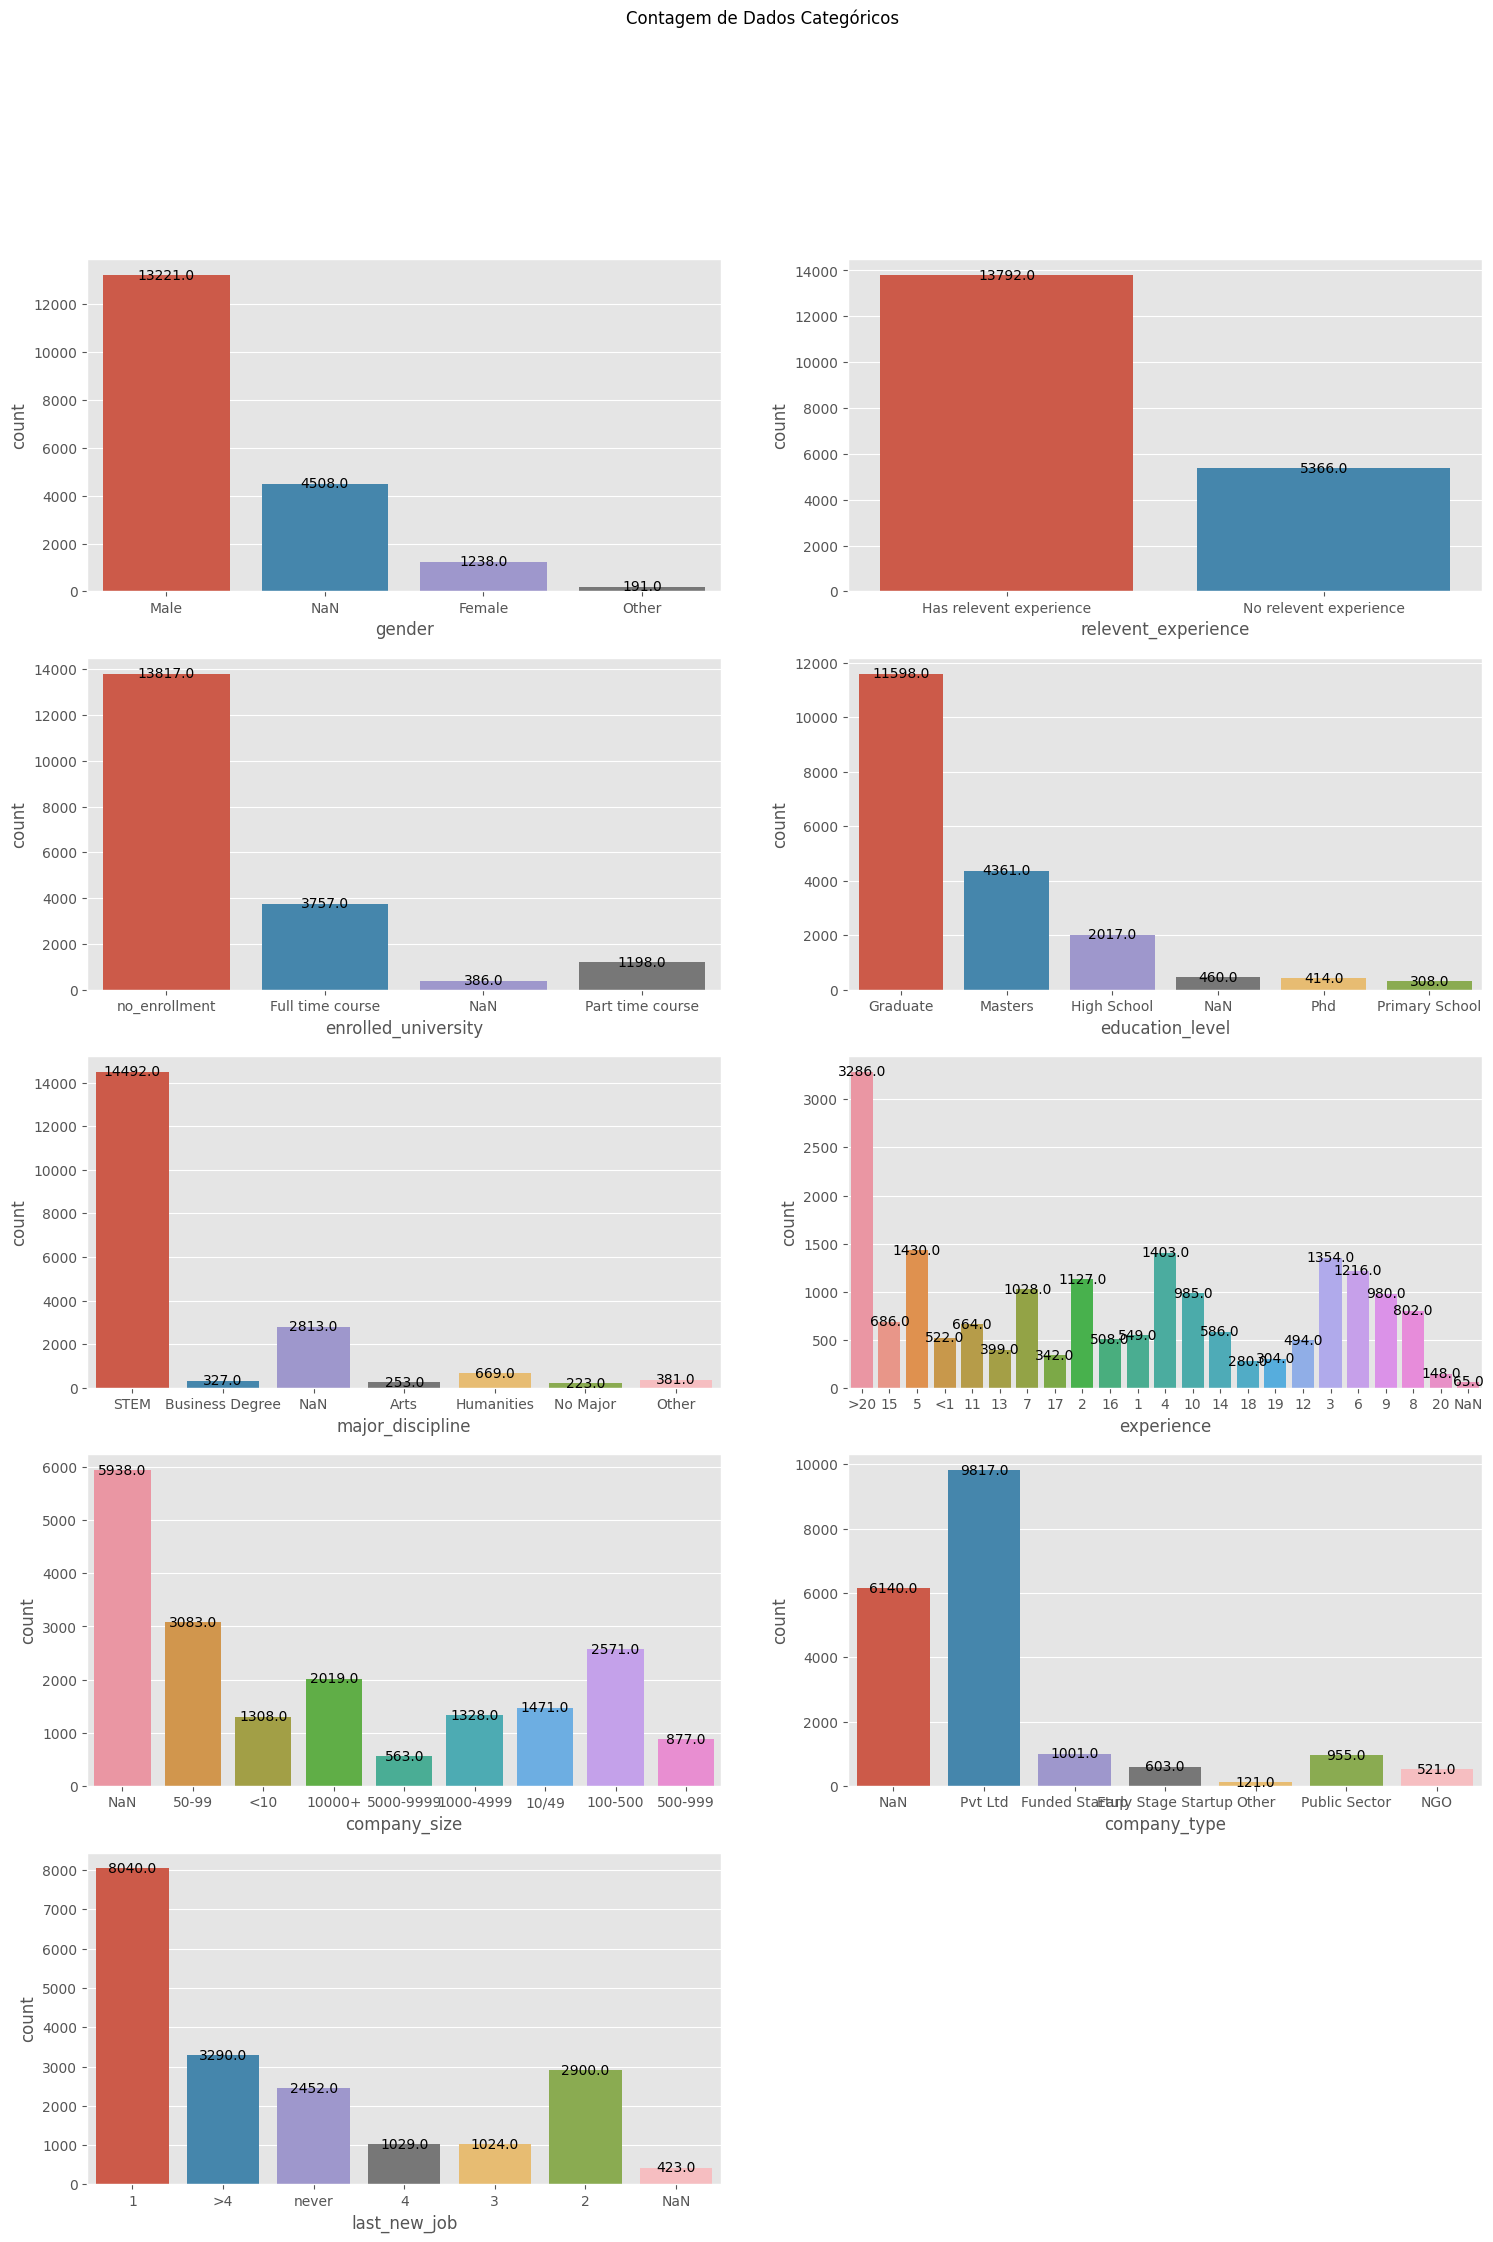

In [10]:
plt.figure(figsize=(18, 25))
plt.tight_layout(pad=0.5)

lista_categoricas = list(df.columns[3:12])
# df.select_dtypes(include=object).columns
for i, coluna in enumerate(lista_categoricas):
  plt.subplot(5, 2, i+1)
  sns.countplot(data=df.fillna('NaN'), x= coluna)
  plt.xlabel(coluna)

  for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.suptitle('Contagem de Dados Categóricos')
plt.show()

Vizualização dos dados numéricos

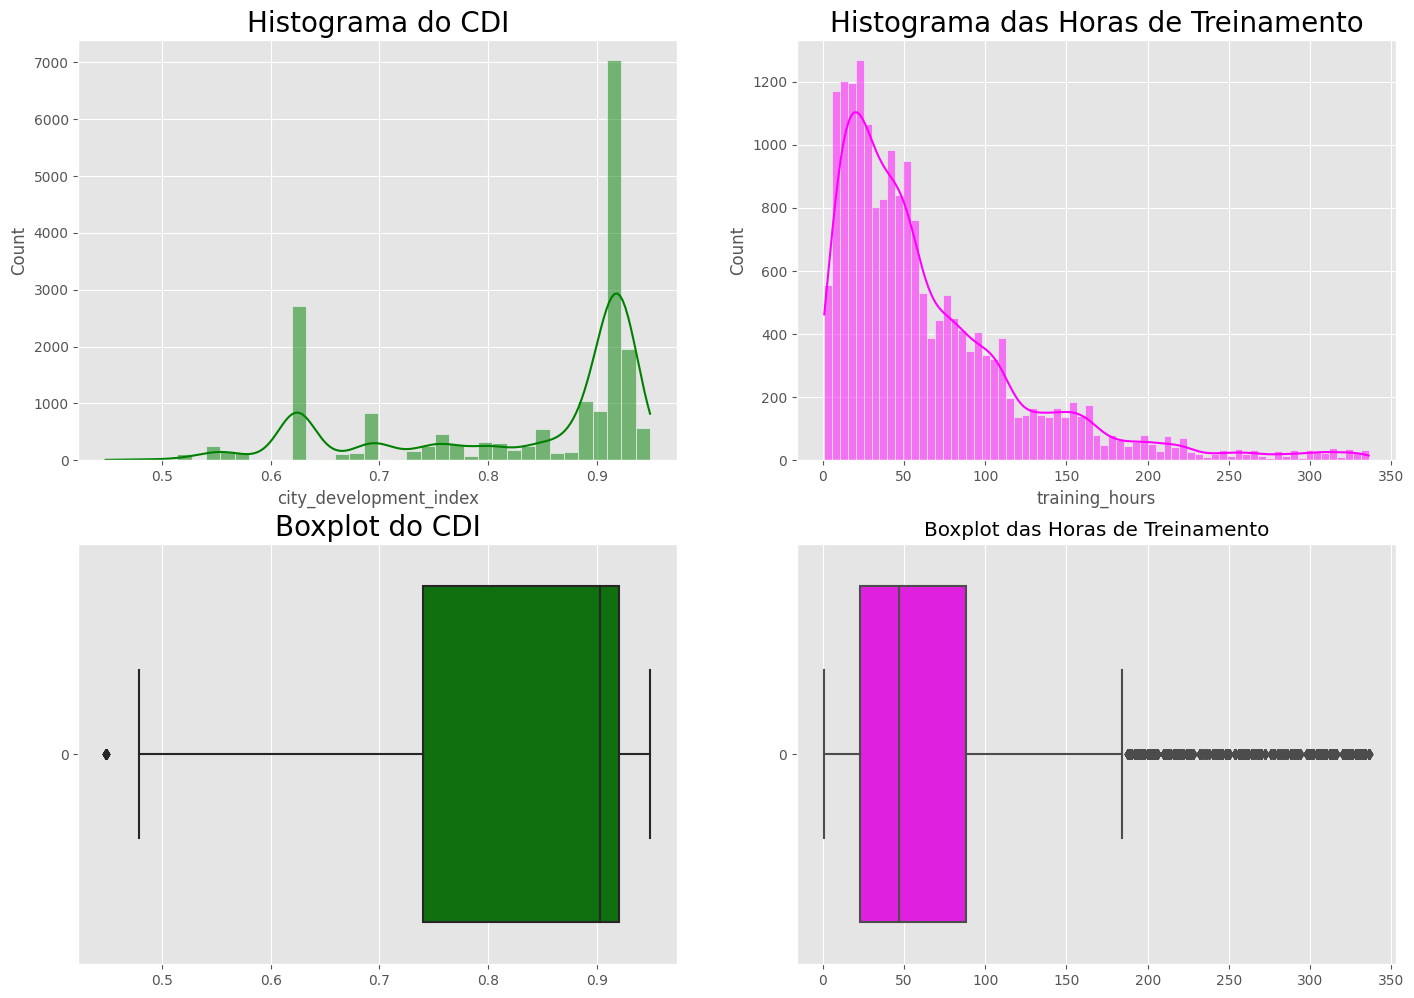

In [11]:
plt.figure(figsize=(17, 12))
plt.tight_layout(pad=0.5)
plt.subplot(221)
sns.color_palette('hls', 8)
sns.histplot(data=df['city_development_index'], kde=True, color='green')
plt.title('Histograma do CDI', fontsize=20)

plt.subplot(222)
sns.histplot(data=df['training_hours'], kde=True, color='magenta')
plt.title('Histograma das Horas de Treinamento', fontsize=20)

plt.subplot(223)
sns.boxplot(data=df['city_development_index'], orient='h', color='green')
plt.title('Boxplot do CDI', fontsize=20)

plt.subplot(224)
sns.boxplot(data=df['training_hours'], orient='h', color='magenta')
plt.title('Boxplot das Horas de Treinamento')
plt.show()

Teste de normalidade para as variáveis numéricas

In [12]:
variaveis_numericas = ['city_development_index', 'training_hours']

for i in variaveis_numericas:
  stats, pval = normaltest(df[i])
  if pval > 0.05:
    print(i,': Distribuição Normal')
  else:
    print(i,': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal
